In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc,f1_score,roc_auc_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Data-Mining-Project/data.csv")

In [ ]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [ ]:
X= df.drop(columns='class')
Y=df['class']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
y_train = np.ravel(y_train)

Logistic Regression Accuracy: 0.9255351220982816


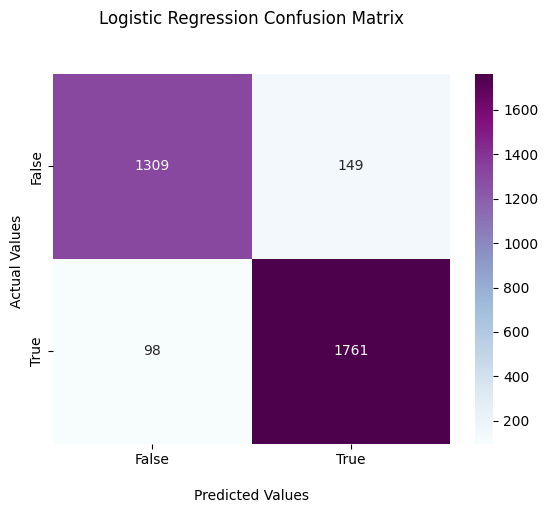

In [ ]:
# Logistic Regression
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
cf_matrix = confusion_matrix(y_test,lr_predictions)
f1_lr = f1_score(y_test,lr_predictions)
lr_auc = roc_auc_score(y_test, lr_classifier.predict_proba(X_test)[:, 1])
image = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='BuPu')
image.set_title('Logistic Regression Confusion Matrix\n\n');
image.set_xlabel('\nPredicted Values')
image.set_ylabel('Actual Values ');
image.xaxis.set_ticklabels(['False','True'])
image.yaxis.set_ticklabels(['False','True'])
print("Logistic Regression Accuracy:", lr_accuracy)

KNN Accuracy: 0.6352125414531203


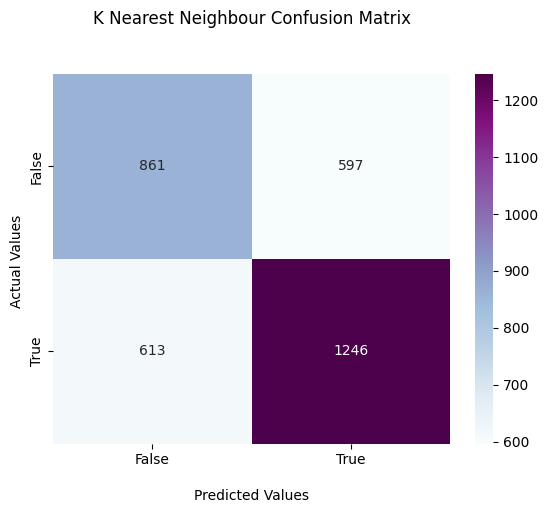

In [ ]:
# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
cf_matrix = confusion_matrix(y_test,knn_predictions)
f1_KNN = f1_score(y_test,knn_predictions)
KNN_auc = roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:, 1])
image = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='BuPu')
image.set_title('K Nearest Neighbour Confusion Matrix\n\n');
image.set_xlabel('\nPredicted Values')
image.set_ylabel('Actual Values ');
image.xaxis.set_ticklabels(['False','True'])
image.yaxis.set_ticklabels(['False','True'])
print("KNN Accuracy:", knn_accuracy)

Random Forest Accuracy: 0.970756707868556


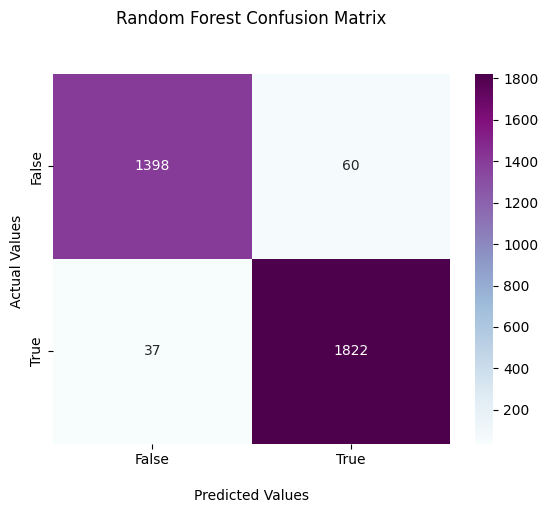

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
cf_matrix = confusion_matrix(y_test,rf_predictions)
f1_rf = f1_score(y_test,rf_predictions)
rf_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
image = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='BuPu')
image.set_title('Random Forest Confusion Matrix\n\n');
image.set_xlabel('\nPredicted Values')
image.set_ylabel('Actual Values ');
image.xaxis.set_ticklabels(['False','True'])
image.yaxis.set_ticklabels(['False','True'])
print("Random Forest Accuracy:", rf_accuracy)

In [ ]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1458
           1       0.97      0.98      0.98      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



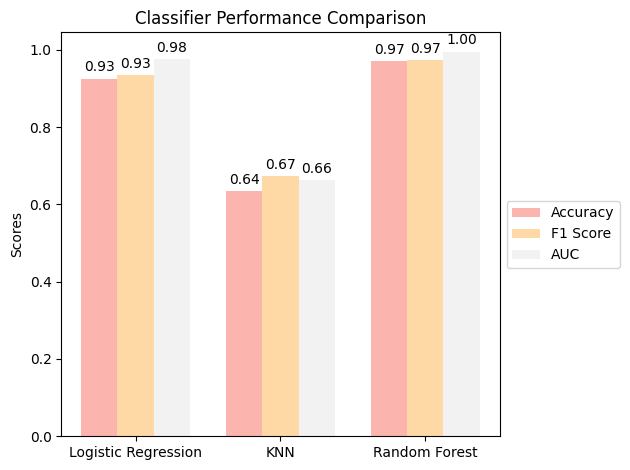

In [ ]:
classifiers = ['Logistic Regression','KNN', 'Random Forest']
accuracy = [lr_accuracy,knn_accuracy,rf_accuracy]
f1_score = [f1_lr,f1_KNN,f1_rf]
auc = [lr_auc, KNN_auc,rf_auc]

# Define colors for the bars
colors = plt.cm.Pastel1(np.linspace(0, 1, len(classifiers)))

# Plotting the metrics
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color = colors[0])
rects2 = ax.bar(x, f1_score, width, label='F1 Score', color = colors[1])
rects3 = ax.bar(x + width, auc, width, label='AUC', color = colors[2])

# Add value annotations
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects3:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('Scores')
ax.set_title('Classifier Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

# Move the legend outside of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()